# Confidence Interval

In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(13, 7.5)})

In [9]:
np.random.seed(42)

normal_distribution_male_mass_pound = np.random.normal(loc=181, scale=24, size=6000) # lock adalah mean , scale adalah range, size adalah jumlah

In [7]:
normal_distribution_male_mass_pound

array([192.92113967, 177.68165677, 196.54452491, ..., 151.78230896,
       192.23081013, 152.91326305])

In [10]:
normal_distribution_female_mass_pound = np.random.normal(loc=132, scale=22, size=6500)

In [11]:
normal_distribution_female_mass_pound

array([107.49021012, 118.11952166, 111.27467596, ..., 148.4088434 ,
       127.93855812, 106.53031567])

In [15]:
all_mass_value = np.concatenate((normal_distribution_female_mass_pound, normal_distribution_male_mass_pound), axis=0)

In [16]:
df_ppl_mass = pd.DataFrame(data={'mass pounds' : all_mass_value})

In [18]:
df_ppl_mass

,mass pounds
0,107.490210
1,118.119522
2,111.274676
3,119.944092
4,127.288693
...,...
12495,185.115264
12496,208.663554
12497,151.782309
12498,192.230810


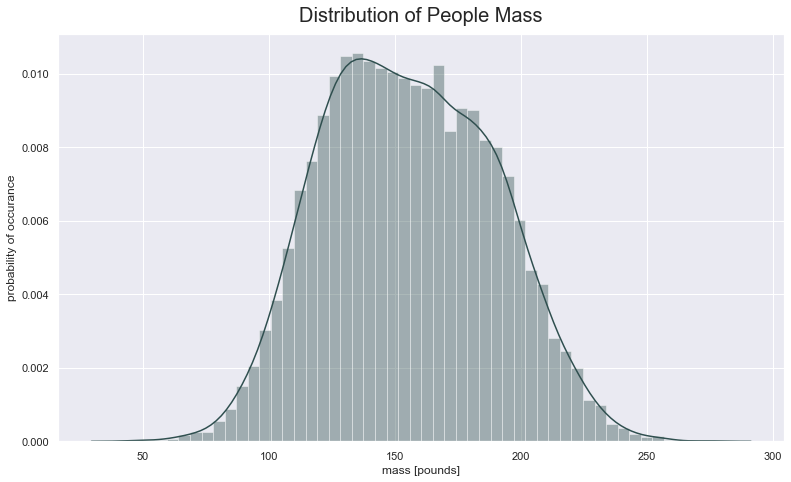

In [23]:
sns.distplot(df_ppl_mass['mass pounds'], color='darkslategrey')
plt.xlabel('mass [pounds]')
plt.ylabel('probability of occurance')
plt.title('Distribution of People Mass', y=1.015, fontsize=20)

plt.show()

In [24]:
pop_mean_mass = df_ppl_mass['mass pounds'].mean()

In [25]:
pop_mean_mass

155.4232805942342

In [27]:
# Calculate Population Standard Deviation 

pop_std_dev_mass = df_ppl_mass['mass pounds'].std()
pop_std_dev_mass

33.58519088395852

In [58]:
# Sample 25 orang, 300x sample

sample_means = []
n = 25

for sample in range(0, 10000):
    #random sampling
    sample_values = np.random.choice(a=df_ppl_mass['mass pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

In [30]:
sample_means

[153.68120074625185,
 152.0102594197322,
 163.31264991176783,
 159.53387600603753,
 153.9641362823598,
 144.8236605279268,
 157.6814243688375,
 155.66186029214347,
 150.16857113856332,
 147.99255569888214,
 152.8369787526728,
 158.8204901752338,
 142.11169260707712,
 153.32475813655557,
 156.46655400180916,
 154.3210825340282,
 159.51451558916347,
 149.14018837650474,
 158.67230055566978,
 157.0638221951413,
 147.90949836057115,
 162.33216327117069,
 158.30636885751005,
 148.17656221360366,
 157.77462250592612,
 151.8377260283794,
 147.3907274726791,
 153.08204764684416,
 164.35544778346932,
 155.965574496672,
 155.40200774575874,
 158.27677065520055,
 164.59395063799747,
 160.14334632199984,
 168.1939611211689,
 163.4297925334905,
 151.24904063358215,
 161.23961660920293,
 143.0037653530687,
 153.43793604088202,
 148.2515890438636,
 154.515930504817,
 149.1454376482281,
 156.35842621525205,
 150.13501741060165,
 157.70775328955148,
 144.37201893273598,
 165.64015100727582,
 155.687469

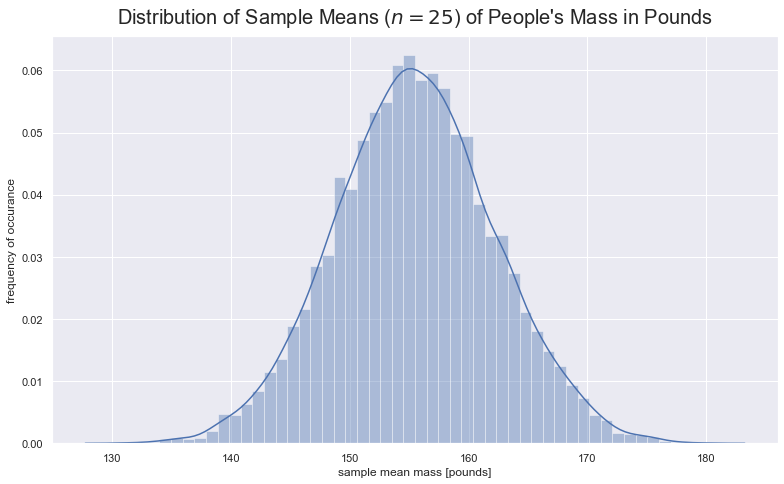

In [59]:
sns.distplot(sample_means)
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()

In [60]:
# Calculate Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.46358064171397

In [61]:
pop_mean_mass

155.4232805942342

In [62]:
# Calculate Std Dev of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.688663697017925

In [63]:
# Calculate Std Error

standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791704

In [64]:
gym_sample_means = 163

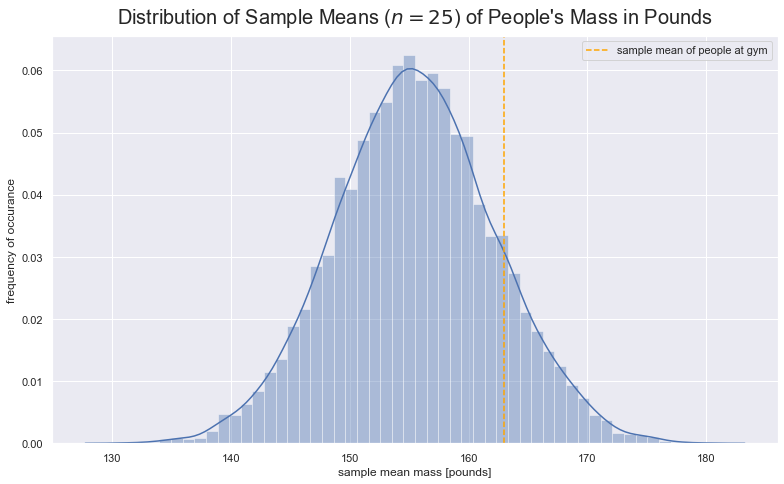

In [65]:
# Visualize gym sample means to sampling distribution

sns.distplot(sample_means)
plt.axvline(x = gym_sample_means, linestyle='--', label='sample mean of people at gym', c = 'orange')
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')
plt.legend()
plt.show()

In [66]:
lower_CI = mean_of_sample_means - 1.96*standard_error

In [67]:
upper_CI = mean_of_sample_means + 1.96*standard_error

In [68]:
print(lower_CI)
print(upper_CI)

142.29818581520223
168.62897546822572


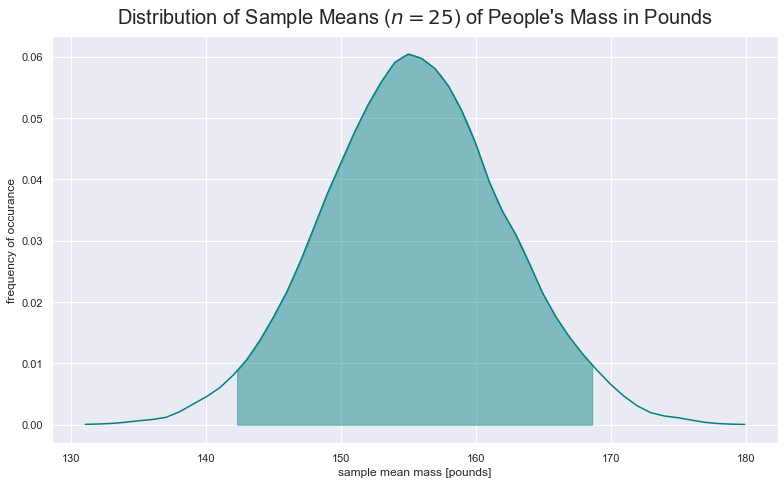

In [72]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_CI, upper_CI)

plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title('Distribution of Sample Means ($n=25$) of People\'s Mass in Pounds', y=1.015, fontsize=20)
plt.xlabel('sample mean mass [pounds]')
plt.ylabel('frequency of occurance')

plt.show()

In [ ]:
# Probability Distribution

In [ ]:
# Uniform

In [73]:
from scipy.stats import uniform

In [79]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

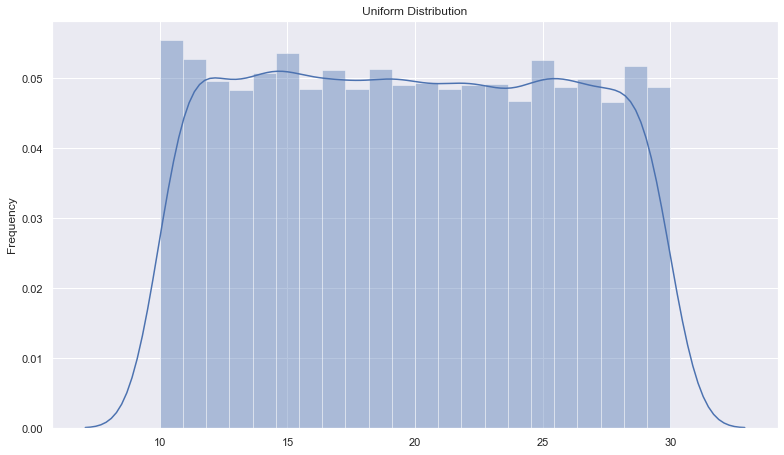

In [84]:
sns.distplot(data_uniform)
plt.title('Uniform Distribution')
plt.ylabel('Frequency')

plt.show()

In [85]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

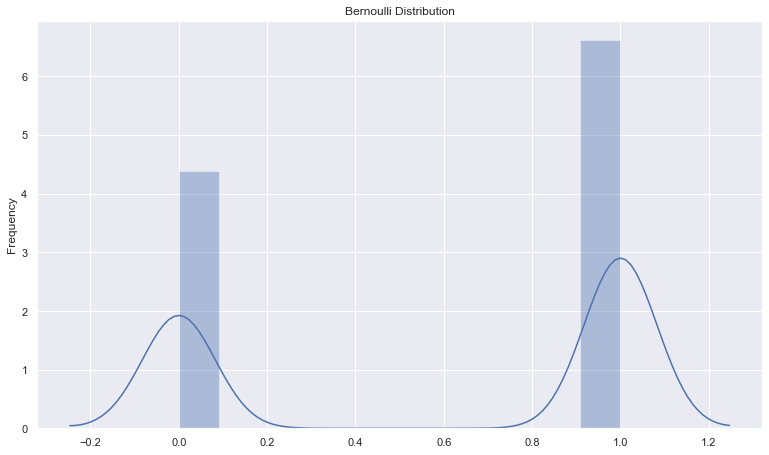

In [86]:
sns.distplot(data_bern)
plt.title('Bernoulli Distribution')
plt.ylabel('Frequency')

plt.show()

In [94]:
# Binomial
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

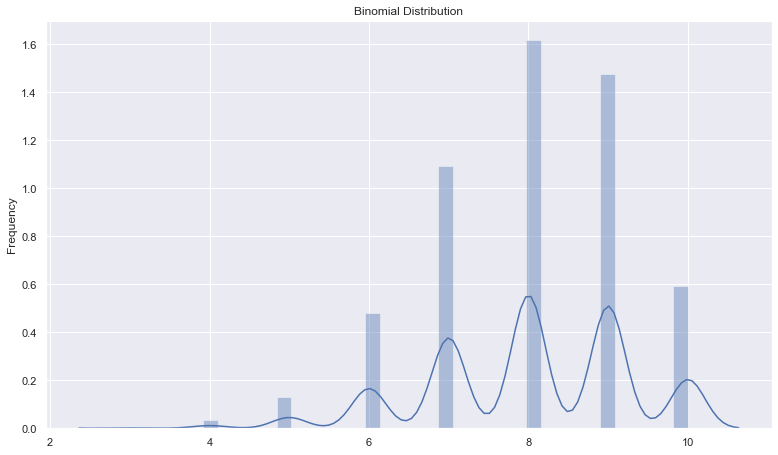

In [95]:
sns.distplot(data_binom)
plt.title('Binomial Distribution')
plt.ylabel('Frequency')

plt.show()

In [96]:
# Poisson
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

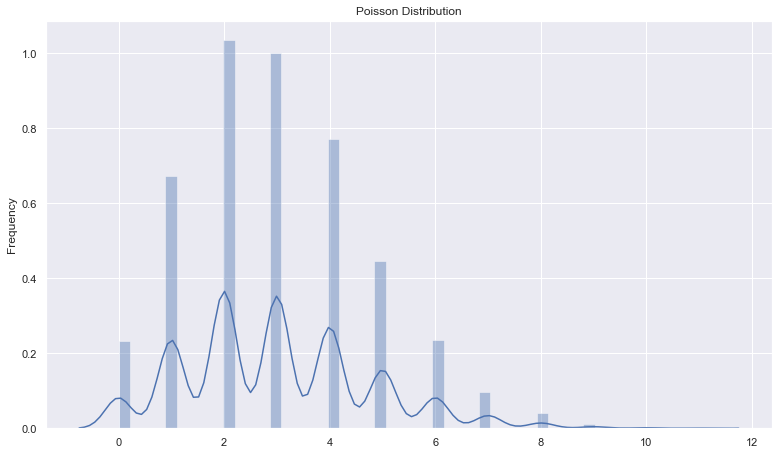

In [97]:
sns.distplot(data_poisson)
plt.title('Poisson Distribution')
plt.ylabel('Frequency')

plt.show()

In [98]:
# Normal
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

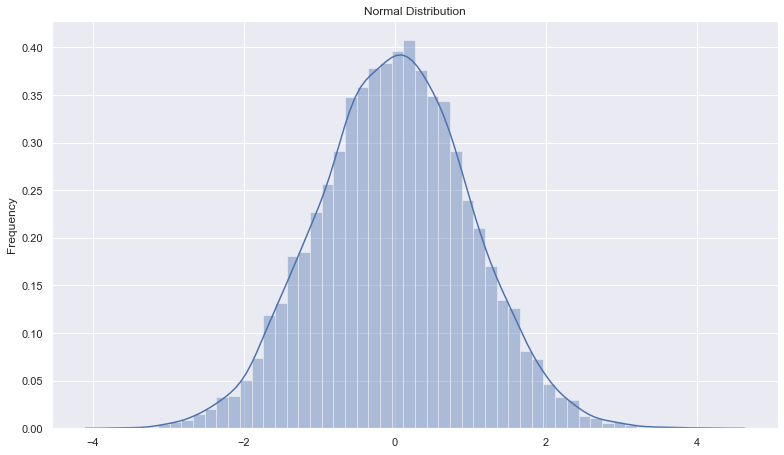

In [99]:
sns.distplot(data_normal)
plt.title('Normal Distribution')
plt.ylabel('Frequency')

plt.show()

In [100]:
# Exponential
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=10000)

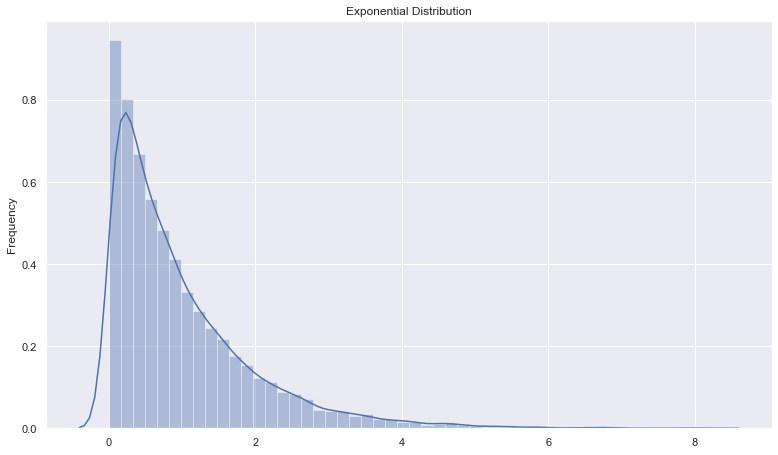

In [101]:
sns.distplot(data_expon)
plt.title('Exponential Distribution')
plt.ylabel('Frequency')

plt.show()

In [102]:
# Hypothesis

In [120]:
import statsmodels.api as sm

In [104]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [114]:
female = da[
    da['RIAGENDR'] == 2
]

male = da[
    da['RIAGENDR'] == 1
]

In [108]:
female.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0


In [109]:
male.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0


In [112]:
n1 = len(female)
mu1 = female['BMXBMI'].mean()
sd1 = female['BMXBMI'].std()

(n1, mu1, sd1)

(2976, 29.939945652173996, 7.75331880954568)

In [113]:
n2 = len(male)
mu2 = male['BMXBMI'].mean()
sd2 = male['BMXBMI'].std()

(n2, mu2, sd2)

(2759, 28.778072111846985, 6.252567616801485)

In [124]:
sm.stats.ztest(female['BMXBMI'].dropna(), male['BMXBMI'].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

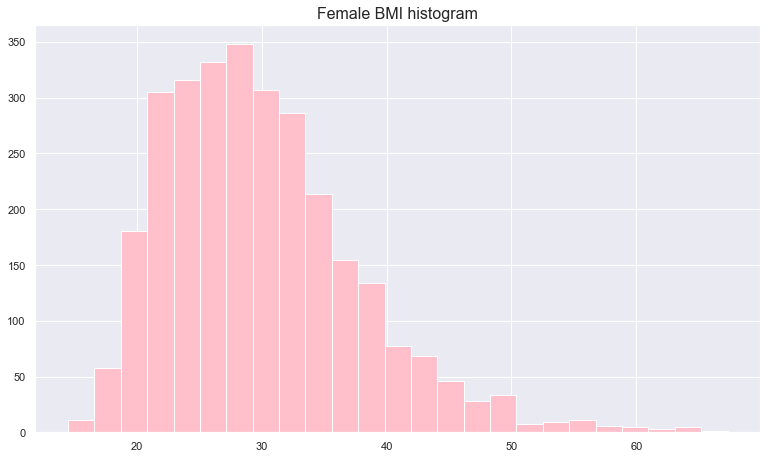

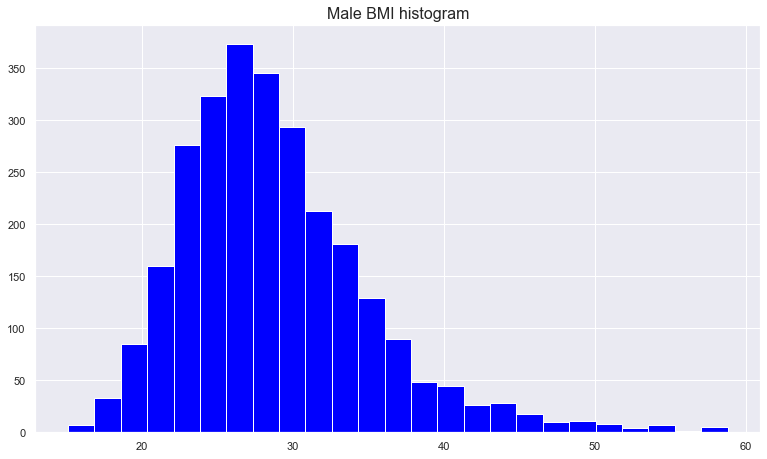

In [130]:
plt.title("Female BMI histogram",fontsize=16)
plt.hist(female['BMXBMI'].dropna(), color = 'pink', bins = 25)
plt.show()


plt.title("Male BMI histogram",fontsize=16)
plt.hist(male['BMXBMI'].dropna(), color = 'blue', bins = 25)
plt.show()
